In [ ]:
# installation
!pip install -q condacolab
import condacolab;
condacolab.install();

✨🍰✨ Everything looks OK!


In [ ]:
# installation
!conda create -n deepmd deepmd-kit lammps -c conda-forge

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/deepmd

  added / updated specs:
    - deepmd-kit
    - lammps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-2.2.0              |     pyhd8ed1ab_0         194 KB  conda-forge
    annotated-types-0.7.0      |     pyhd8ed1ab_1          18 KB  conda-forge
    array-api-compat-1.11.2    |     pyh29332c3_0          41 KB  conda-forge
    astunparse-1.6.3           |     pyhd8ed1ab_3          18 KB  conda-forge
    attr-2.5.1                 |       h166bdaf_1          69 KB  conda-forge
    binutils_impl_linux-64-2.43|       h4bf12b8_4         5

In [ ]:
# checking the environment
envs = "source activate base; conda activate deepmd"
!$envs; which lmp

/usr/local/envs/deepmd/bin/lmp


In [ ]:
# mount Google Drive where the data are stored.
from google.colab import drive
import os
vmi24f = r'/content/drive/MyDrive/Bai_bao'
drive.mount('/content/drive', force_remount = False)
os.chdir(vmi24f+"/LAMMPS/NMC_622/")

Mounted at /content/drive


In [ ]:
!cat $vmi24f/LAMMPS/NMC_622/in.replicate.lammps

units metal
atom_style atomic
boundary p p p

read_data conf.lmp
replicate 2 2 2

# Add this block before write_data:
mass 1 58.9332   # Co
mass 2 6.941     # Li
mass 3 54.938    # Mn
mass 4 58.6934   # Ni
mass 5 15.999    # O

write_data conf_replicated.lmp

In [ ]:
!$envs; \
lmp -in in.replicate.lammps

In [ ]:
!cat $vmi24f/LAMMPS/NMC_622/in_800K.lammps

log log.nmc_622_800K.lammps
units metal
atom_style atomic
boundary p p p

read_data conf_replicated.lmp

# Example potential
pair_style deepmd graph-compress.pb
pair_coeff * * Co Li Mn Ni O

mass 1 58.9332  # Co
mass 2 6.941    # Li
mass 3 54.938   # Mn
mass 4 58.6934  # Ni
mass 5 15.999   # O

timestep 0.001
thermo 100
fix 1 all nvt temp 800 800 0.1
dump 1 all custom 50 dump.nmc_622_800K.lammpstrj id type x y z
thermo 100
thermo_style custom step temp etotal ke pe press
run 100000

In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.29
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [14]:
!$envs; \
export OMP_NUM_THREADS=2;\
lmp < in_800K.lammps

LAMMPS (29 Aug 2024)
  using 2 OpenMP thread(s) per MPI task
Loaded 1 plugins from /usr/local/envs/deepmd/lib/deepmd_lmp
Reading data file ...
  triclinic box = (0 0 0) to (28.429001 4.9240473 28.291201) with tilt (-2.8429 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  480 atoms
  reading velocities ...
  480 velocities
  read_data CPU = 0.011 seconds
DeePMD-kit WARNING: Environmental variable DP_INTRA_OP_PARALLELISM_THREADS is not set. Tune DP_INTRA_OP_PARALLELISM_THREADS for the best performance. See https://deepmd.rtfd.io/parallelism/ for more information.
DeePMD-kit WARNING: Environmental variable DP_INTER_OP_PARALLELISM_THREADS is not set. Tune DP_INTER_OP_PARALLELISM_THREADS for the best performance. See https://deepmd.rtfd.io/parallelism/ for more information.
Summary of lammps deepmd module ...
  >>> Info of deepmd-kit:
  installed to:       /usr/local/envs/deepmd
  source:             
  source branch:      HEAD
  source commit:      36f34ee
  source commit at:   

In [ ]:
!$envs; \
lmp -in in.replicate.lammps

LAMMPS (29 Aug 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from /usr/local/envs/deepmd/lib/deepmd_lmp
Reading data file ...
  triclinic box = (0 0 0) to (14.2145 2.4620237 14.1456) with tilt (-1.42145 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  60 atoms
  read_data CPU = 0.007 seconds
Replication is creating a 2x2x2 = 8 times larger system...
  triclinic box = (0 0 0) to (28.429001 4.9240473 28.291201) with tilt (-2.8429 0 0)
  1 by 1 by 1 MPI processor grid
  480 atoms
  replicate CPU = 0.001 seconds
System init for write_data ...

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- Type Label Framework: https://doi.org/10.1021/acs.jpcb.3c08419
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Total wall time: 0:00:01


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Read the uploaded LAMMPS log file
with open("log_NMC622_500K.lammps", "r") as f:
    lines = f.readlines()

data_lines = []
collecting = False

for line in lines:
    if line.strip().startswith("Step") and "TotEng" in line:
        collecting = True
        continue
    if collecting:
        if line.strip() == "" or not line.strip()[0].isdigit():
            break
        parts = line.split()
        data_lines.append([float(parts[0]), float(parts[4])])  # Step and TotEng

# Create DataFrame
df = pd.DataFrame(data_lines, columns=["Step", "TotEng"])

# Save CSV and display
output_path = "log_NMC622_500K.lammps.csv"
df.to_csv(output_path, index=False)

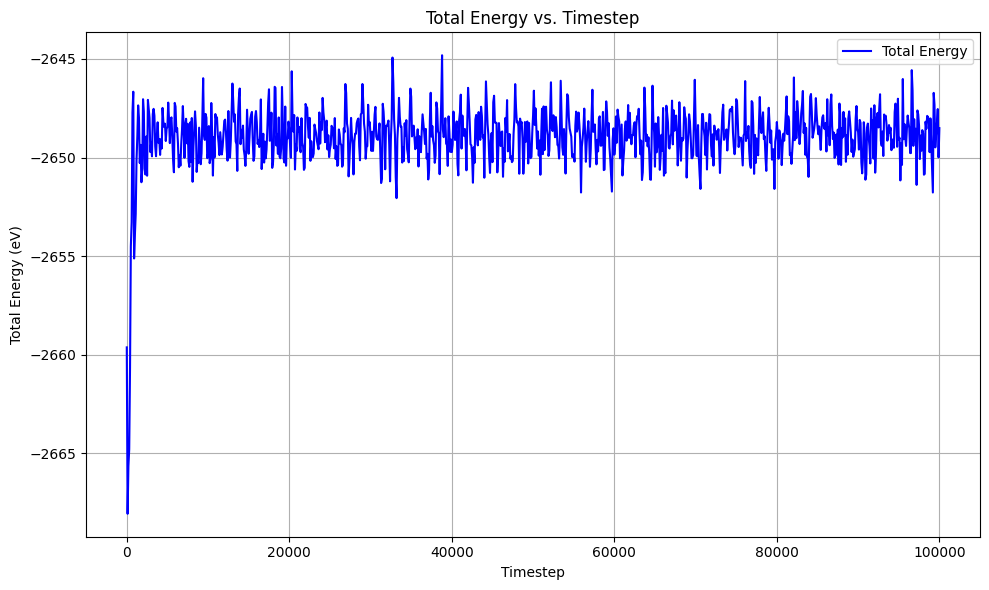

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file again
df = pd.read_csv("log_NMC622_500K.lammps.csv")

# Plot TotEng vs. Step
plt.figure(figsize=(10, 6))
plt.plot(df["Step"], df["TotEng"], label="Total Energy", color='blue')
plt.xlabel("Timestep")
plt.ylabel("Total Energy (eV)")
plt.title("Total Energy vs. Timestep")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("log_NMC622_500K.lammps.png")
plt.show()

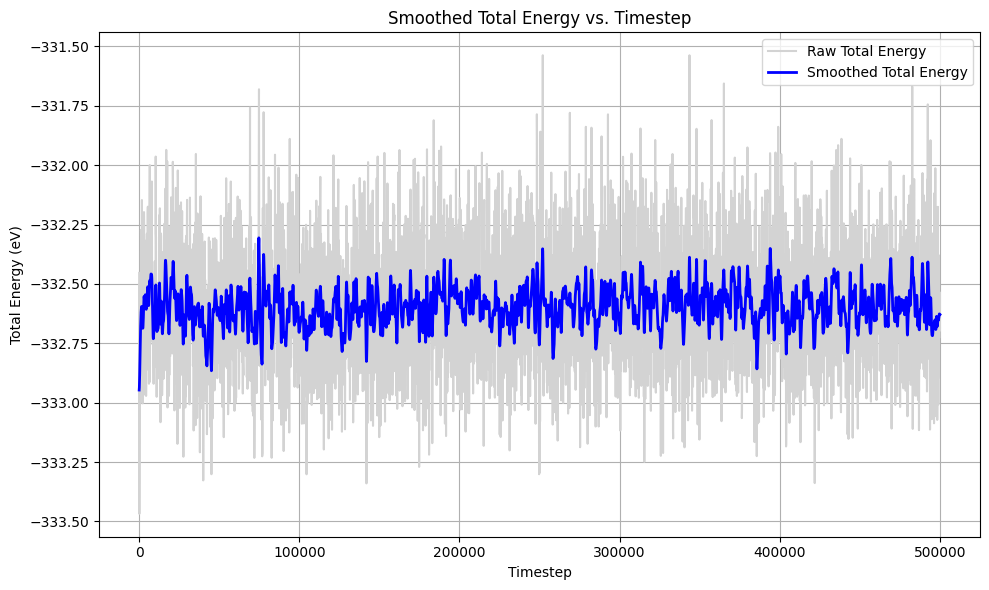

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Smooth the total energy using a Gaussian filter
smoothed_energy = gaussian_filter1d(df["TotEng"], sigma=3)

# Plot both raw and smoothed energy
plt.figure(figsize=(10, 6))
plt.plot(df["Step"], df["TotEng"], label="Raw Total Energy", color='lightgray')
plt.plot(df["Step"], smoothed_energy, label="Smoothed Total Energy", color='blue', linewidth=2)
plt.xlabel("Timestep")
plt.ylabel("Total Energy (eV)")
plt.title("Smoothed Total Energy vs. Timestep")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("smoothed_toteng_vs_step_plot.png")
plt.show()

In [ ]:
!cat $vmi24f/LAMMPS/log.lammps

LAMMPS (29 Aug 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from /usr/local/envs/deepmd/lib/deepmd_lmp
units metal
atom_style atomic
boundary p p p

read_data conf.lmp
Reading data file ...
  triclinic box = (0 0 0) to (14.2145 2.4620237 14.1456) with tilt (-1.42145 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  60 atoms
  read_data CPU = 0.005 seconds

# Example potential
pair_style deepmd graph-compress.pb
Summary of lammps deepmd module ...
  >>> Info of deepmd-kit:
  installed to:       /usr/local/envs/deepmd
  source:             
  source branch:      HEAD
  source commit:      36f34ee
  source commit at:   2025-03-02 14:20:26 +0800
  support model ver.: 1.1 
  build variant:      cpu
  build with tf inc:  /usr/local/envs/deepmd/lib/python3.12/site-packages/tensorflow/include;/usr/local/envs/deepmd/lib/python3.12/site-packages/tensorflow/../../../../include
  build wit

In [ ]:
!pip install ase

In [ ]:
from ase.io import read
import pandas as pd

# Load all frames from the LAMMPS dump file
traj = read("dump.nmc.lammpstrj", format="lammps-dump-text", index=":")

# Extract data
frames_data = []
for i, atoms in enumerate(traj):
    for atom in atoms:
        frames_data.append({
            "timestep": i,
            "id": atom.index + 1,
            "type": atom.number,
            "x": atom.position[0],
            "y": atom.position[1],
            "z": atom.position[2]
        })

# Create DataFrame
df = pd.DataFrame(frames_data)

# Save as CSV for easy plotting/visualization
df.to_csv("trajectory_data.csv", index=False)
